<a href="https://colab.research.google.com/github/Frank-Howd/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# Make Explanatory Visualizations

### Objectives

- Student can identify the appropriate visualization type for a particular variable type and research question 
- Student can use Matplotlib to visualize distributions and relationships with continuous and discrete variables
- Student can add emphasis and annotations to transform visualizations from exploratory to explanatory
- Student can remove clutter from visualizations
- Student can identify misleading visualizations and how to fix them



Import the Titanic dataset and print the first 5 rows.

In [8]:
import pandas as pd

# Load the Titanic dataset from its URL:
Titanic = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Titanic/Titanic.csv')

print(Titanic.shape)
print(Titanic.info())
Titanic.head()

#Titanic['Age'].sort_values()

(887, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses_Aboard  887 non-null    int64  
 6   Parents/Children_Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB
None


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [11]:
### YOUR CODE HERE 

Titanic['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     36
7.7500     33
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

###1) What are the appropriate visualizations to answer the question "What was the typical fare paid for passage on the Titanic?"



Answer here

###2) Create the visualizations you selected in 2).  

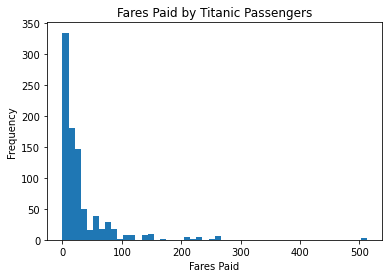

In [23]:
### YOUR CODE HERE 

import matplotlib.pyplot as plt

plt.hist(Titanic['Fare'], bins=50)

plt.xlabel('Fares Paid')
plt.ylabel('Frequency')
plt.title('Fares Paid by Titanic Passengers')

plt.show()

###3) Describe your results in a sentence or two.

It appears that the distribution of the Fares Paid is skewed positively to the right ('Can't pay less than zero, but can pay more for better accomodation classes').  It looks like mose fairs were < 50, and the winner of paying the most was a little greater than > 500 (significant for the times). 

###4) Plot a histogram of fare paid by Titanic passengers by sex to see if there was a difference in fare paid between male and female passengers.  

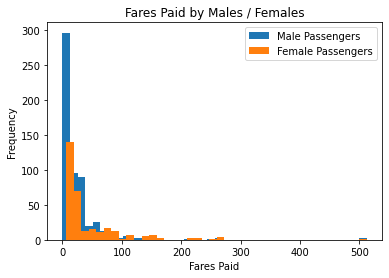

In [33]:
### YOUR CODE HERE 

males = Titanic[Titanic['Sex'] == 'male']
females = Titanic[Titanic['Sex'] == 'female']

plt.hist(males['Fare'], label='Male Passengers', bins=40)
plt.hist(females['Fare'], label='Female Passengers', bins=40)

plt.xlabel('Fares Paid')
plt.ylabel('Frequency')
plt.title('Fares Paid by Males / Females')
plt.legend(loc='upper right')

plt.show()

###5) Describe the difference in distribution of fare paid between male and female passengers.

Both ditributions are skewed positively/right.  In the lower quartile(s), men appear to have paid larger fares than their female counterparts.  

###6) Make a bar plot to show the frequency of individuals in each passenger class.

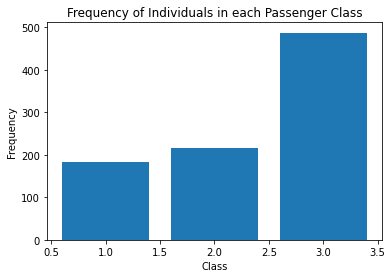

In [58]:
### YOUR CODE HERE 

Titanic['Pclass'].value_counts() #{'Class 3': 487, 'Class2': 216, 'Class1': 184}

classSum = pd.DataFrame({'Class': [3, 2, 1], 
                         'Frequency': [487, 216, 184]}, index=[3, 2, 1])

# dx = classSum.plot.bar(x='Class', y='Frequency', rot=0)
# dx.get_legend().remove()

plt.bar(classSum['Class'], classSum['Frequency'])

plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of Individuals in each Passenger Class')

plt.show()


The most frequently purchased passenger class was 3rd class, follwed by 2nd class, followed by 1st class. 


Answer here

###8) Create a graphical summary for the number of parents/ children on board for each passenger.

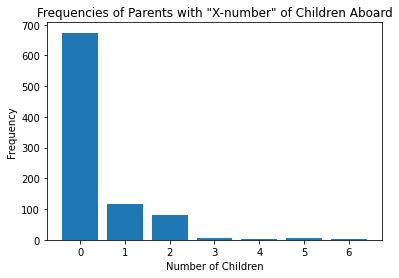

In [75]:
### YOUR CODE HERE 

# Titanic['Parents/Children_Aboard'].value_counts(sort=True)
# pd.crosstab(index=Titanic['Parents/Children_Aboard'], columns='count')

pcSummary = pd.DataFrame({'Parents/Children_Aboard': [0, 1, 2, 3, 4, 5, 6],
                          'Frequency': [674, 118, 80, 5, 4, 5, 1]})

plt.bar(pcSummary['Parents/Children_Aboard'], pcSummary['Frequency'])

# dx = pcSummary.plot.bar(x='Parents/Children_Aboard', y='Frequency', rot=0)
# dx.get_legend().remove()

plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.title('Frequencies of Parents with "X-number" of Children Aboard')

plt.show()

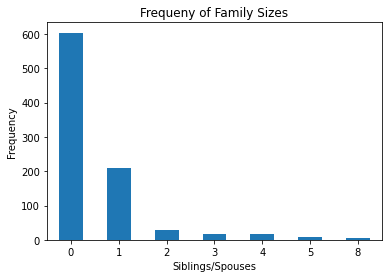

In [88]:
Titanic['Siblings/Spouses_Aboard'].value_counts() 

sibs_spousesSum = pd.DataFrame({'Siblings/Spouses': [0, 1, 2, 3, 4, 5, 8],
                                'Frequency': [604, 209, 28, 18, 16, 7, 5]})

#plt.bar(sibs_spousesSum['Siblings/Spouses'], sibs_spousesSum['Frequency'])

diagram = sibs_spousesSum.plot.bar(x='Siblings/Spouses', y='Frequency', rot=0)
diagram.get_legend().remove()

plt.xlabel('Siblings/Spouses')
plt.ylabel('Frequency')
plt.title('Frequeny of Family Sizes')

plt.show()

###9) Summarize your results from 8).  Did most individuals travel alone or with family?

Most people traveled alone and without children. 

#Project Milestone

Take some time to explore the links below.  Think about how we use graphics to answer research questions and how looking at visualizations can help us develop new lines of enquiry.  

By the end of the weekend, you should have a pretty good idea (though it can change!) what kind of data and visualizations you'd like to include in your Portfolio Project.

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)